<div style="background-color:turquoise; padding:15px; border-radius:10px; text-align:center; color:black; font-size:28px; font-weight:bold;">
Hotel Booking Dataset written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

 <br> and Prediction
</div>



<div style="background-color:gold; padding:10px; border-radius:10px; text-align:center; color:black; font-size:24px; font-weight:bold;">
Utilizare este dataset para practicar y agregarlo en mi carpeta de proyectos
</div>


<p style="font-size:18px; color:darkblue;">
Este conjunto de datos contiene información de reserva de un hotel urbano y un hotel resort, e incluye información como cuándo se realizó la reserva, la duración de la estancia, el número de adultos, niños y/o bebés, y el número de plazas de aparcamiento disponibles, entre otras cosas.
</p>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
import folium
from folium.plugins import HeatMap
import plotly.express as px


In [3]:
df = pd.read_csv('HotelCalifornia.csv', parse_dates = True)
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [4]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null 
#ver valores nulos

Null Values  Percentage Null Values
hotel                                     0                0.000000
is_canceled                               0                0.000000
lead_time                                 0                0.000000
arrival_date_year                         0                0.000000
arrival_date_month                        0                0.000000
arrival_date_week_number                  0                0.000000
arrival_date_day_of_month                 0                0.000000
stays_in_weekend_nights                   0                0.000000
stays_in_week_nights                      0                0.000000
adults                                    0                0.000000
children                                  4                0.003350
babies                                    0                0.000000
meal                                      0                0.000000
country                                 488                0.408744
market_segment                            0                0.000000
distribution_channel                      0                0.000000
is_repeated_guest                         0                0.000000
previous_cancellations                    0                0.000000
previous_bookings_not_canceled            0                0.000000
reserved_room_type                        0                0.000000
assigned_room_type                        0                0.000000
booking_changes                           0                0.000000
deposit_type                              0                0.000000
agent                                 16340               13.686238
company                              112593               94.306893
days_in_waiting_list                      0                0.000000
customer_type                             0                0.000000
adr                                       0                0.000000
required_car_parking_spaces               0                0.000000
total_of_special_requests                 0                0.000000
reservation_status                        0                0.000000
reservation_status_date                   0                0.000000

In [7]:
# rellenado los valores con ceros

df.fillna(0, inplace = True)

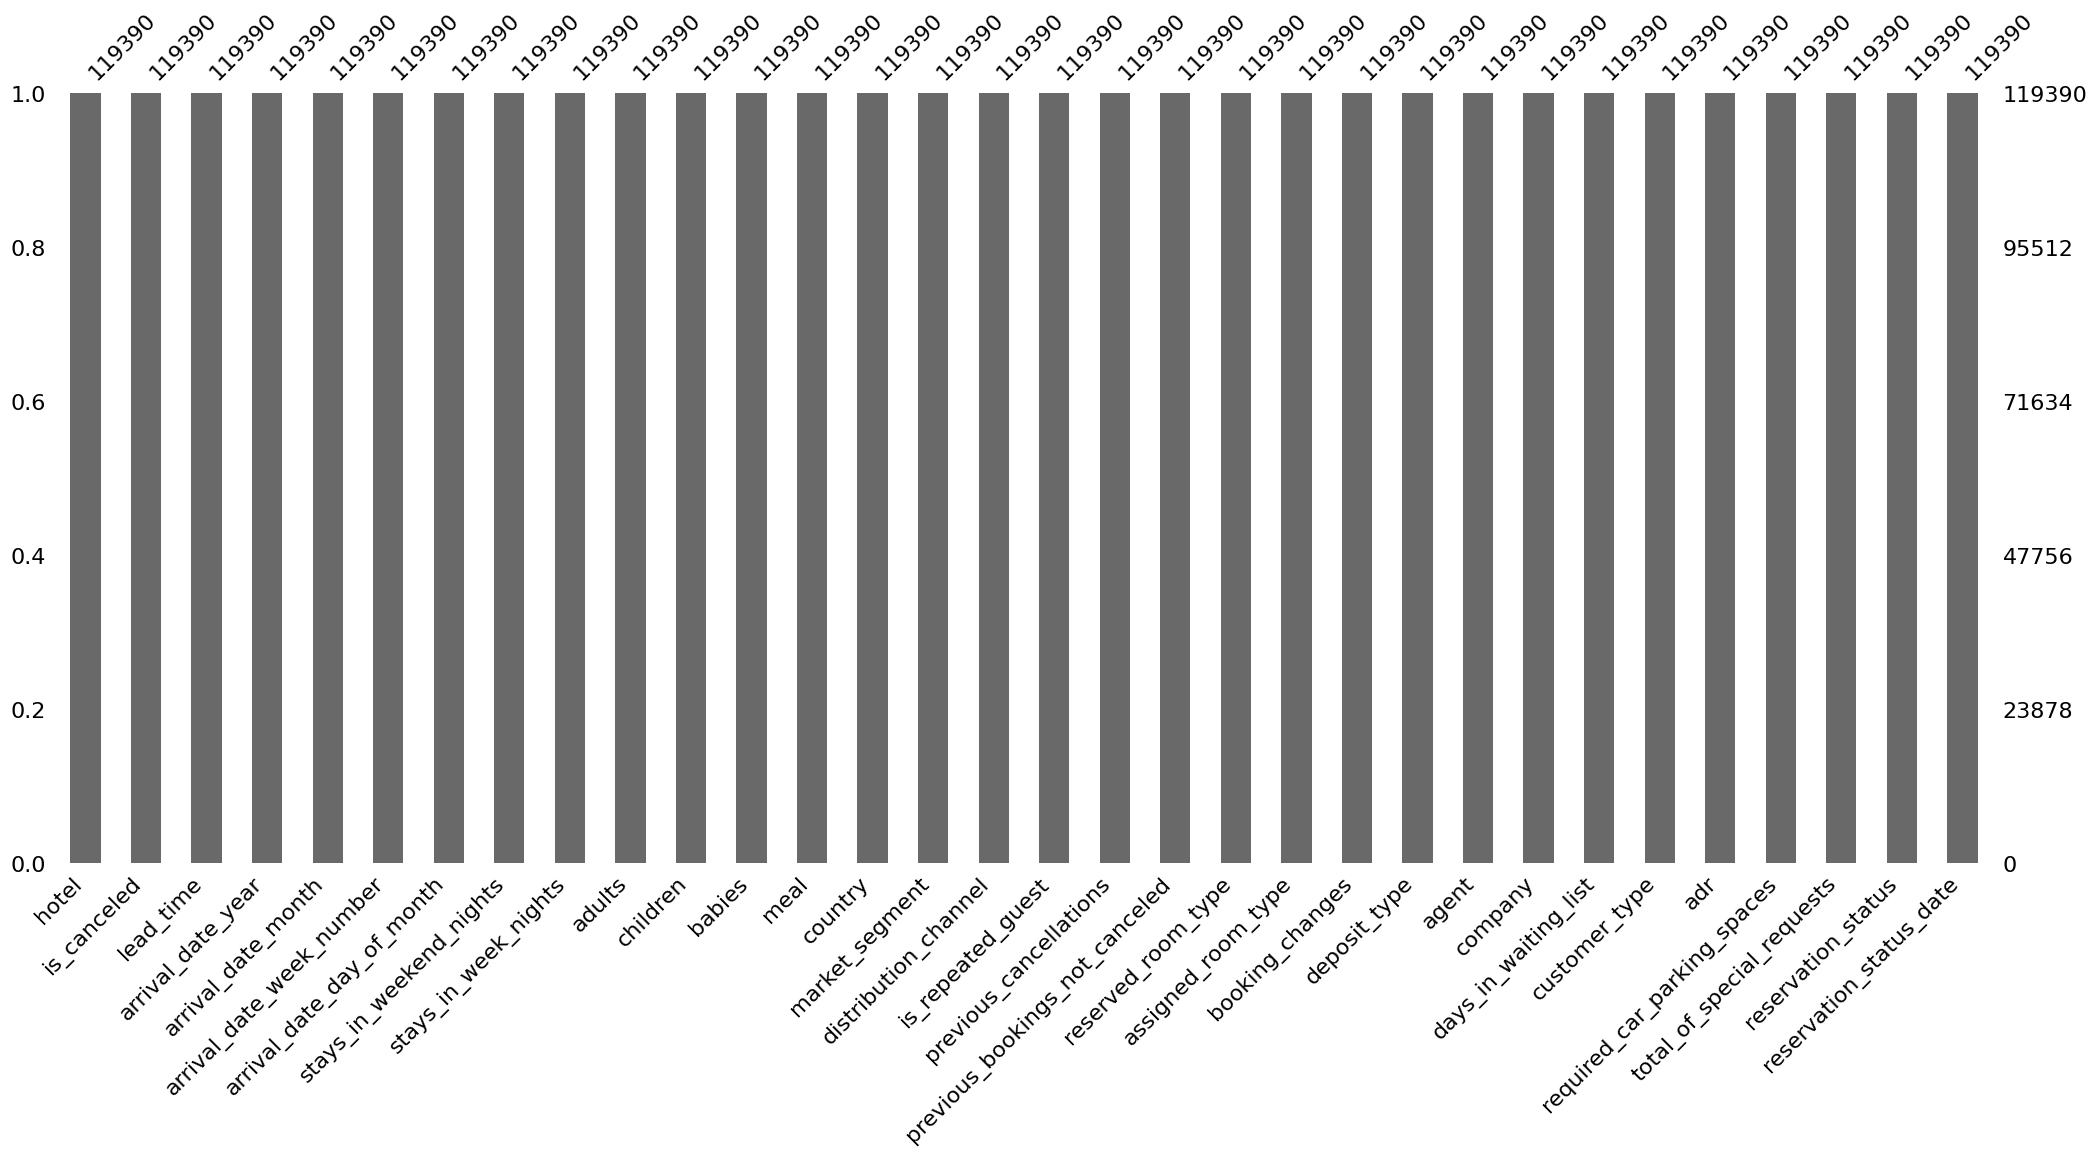

In [8]:
msno.bar(df)
plt.show()

In [9]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
2224                       3       0  ...    No Deposit    0.0   174.0   
2409                       0       0  ...    No Deposit    0.0   174.0   
3181                       2       0  ...    No Deposit   38.0     0.0   
3684                       4       0  ...    No Deposit  308.0     0.0   
3708                       4       0  ...    No Deposit  308.0     0.0   
...                      ...     ...  ...           ...    ...     ...   
115029                     3       0  ...    No Deposit    7.0     0.0   
115091                     1       0  ...    No Deposit    0.0     0.0   
116251                     1       0  ...    No Deposit  425.0     0.0   
116534                     5       0  ...    No Deposit    9.0     0.0   
117087                     2       0  ...    No Deposit   52.0     0.0   

       days_in_waiting_list    customer_type     adr  \
2224                      0  Transient-Party    0.00   
2409                      0        Transient    0.00   
3181                      0  Transient-Party    0.00   
3684                    122  Transient-Party    0.00   
3708                    122  Transient-Party    0.00   
...                     ...              ...     ...   
115029                    0        Transient  100.80   
115091                    0        Transient    0.00   
116251                    0        Transient   73.80   
116534                    0  Transient-Party   22.86   
117087                    0        Transient    0.00   

        required_car_parking_spaces  total_of_special_requests  \
2224                              0                          0   
2409                              0                          0   
3181                              0         

In [10]:
df = df[~filter]
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    0.0     0.0   
1                          0       2  ...    No Deposit    0.0     0.0   
2                          1       1  ...    No Deposit    0.0     0.0   
3                          1       1  ...    No Deposit  304.0     0.0   
4                          2       2  ...    No Deposit  240.0     0.0   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     0.0   
119386                     5       3  ...    No Deposit    9.0     0.0   
119387                     5       2  ...    No Deposit    9.0     0.0   
119388                     5       2  ...    No Deposit   89.0     0.0   
119389                     7       2  ...    No Deposit    9.0     0.0   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

## De que paises provienen los clientes?


In [11]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

country  No of guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     KIR             1
162     ATF             1
163     TJK             1
164     SLE             1
165     FRO             1

[166 rows x 2 columns]

### La mayoria de las personas provienen de portugal 

In [12]:
guests_map = px.choropleth(
    country_wise_guests, 
    locations=country_wise_guests['country'],
    color=country_wise_guests['No of guests'], 
    hover_name=country_wise_guests['country'],
    color_continuous_scale='Blues' 
)
guests_map.show()

# Cuanto es lo que pagan por una habitacion?

In [13]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    0.0     0.0                    0     Transient   0.0   
1    0.0     0.0                    0     Transient   0.0   
2    0.0     0.0                    0     Transient  75.0   
3  304.0     0.0                    0     Transient  75.0   
4  240.0     0.0                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [14]:
fig = px.box(
    data_frame=df,
    x='reserved_room_type',   # eje x: tipo de habitación
    y='adr',                  # eje y: precio promedio diario
    color='hotel',            # color según tipo de hotel
    animation_frame='arrival_date_month',  # agregar animación por mes
    template='plotly_dark',   # tema oscuro
    title='Distribución del precio promedio diario por tipo de habitación, hotel y mes'
)
fig.show()

<h1 style="color:red;">Haré un análisis un precio por noches a través de los meses</h1>


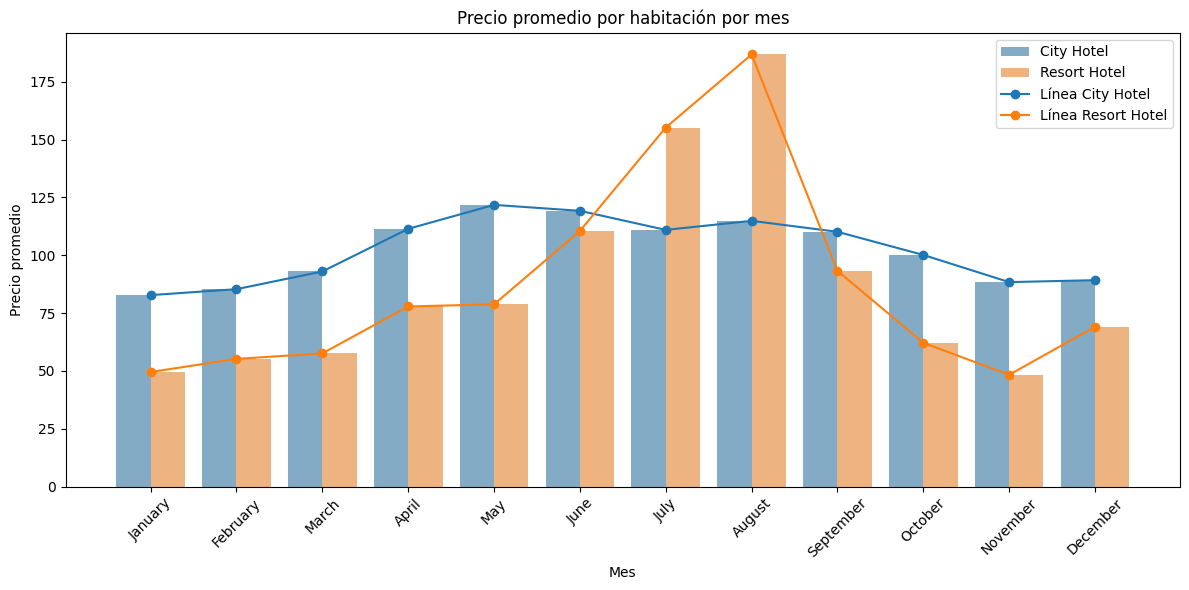

In [15]:
average_prices = df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()
# Ordenar meses si es necesario
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                'August', 'September', 'October', 'November', 'December']
average_prices['arrival_date_month'] = pd.Categorical(
    average_prices['arrival_date_month'],
    categories=months_order,
    ordered=True
)
average_prices = average_prices.sort_values('arrival_date_month')
plt.figure(figsize=(12,6))
# Crear gráfico de barras con seaborn
sns.barplot(data=average_prices, x='arrival_date_month', y='adr', hue='hotel', alpha=0.6)
# Añadir líneas de comparación para cada tipo de hotel
for hotel_type in average_prices['hotel'].unique():
    subset = average_prices[average_prices['hotel'] == hotel_type]
    plt.plot(subset['arrival_date_month'], subset['adr'], marker='o', label=f'Línea {hotel_type}')
# Ajustes finales
plt.title('Precio promedio por habitación por mes')
plt.xlabel('Mes')
plt.ylabel('Precio promedio')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2 style="color: purple;">Cuanto tiempo la gennte se queda en los hoteles </h2

In [16]:
df["total_stay"] = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]
lista_estancias = df[["hotel", "total_stay"]]


print(lista_estancias)


               hotel  total_stay
0       Resort Hotel           0
1       Resort Hotel           0
2       Resort Hotel           1
3       Resort Hotel           1
4       Resort Hotel           2
...              ...         ...
119385    City Hotel           7
119386    City Hotel           7
119387    City Hotel           7
119388    City Hotel           7
119389    City Hotel           9

[119210 rows x 2 columns]


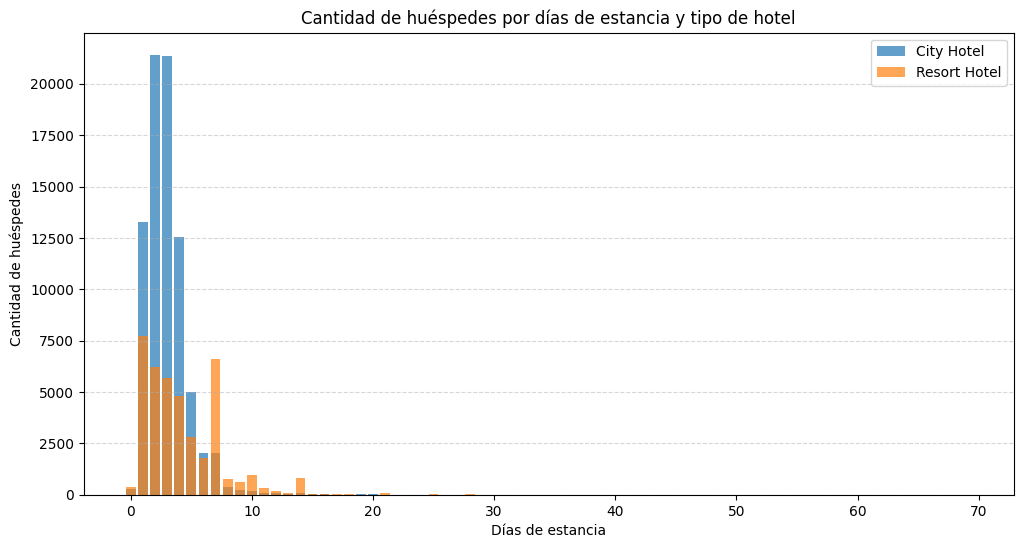

In [17]:
df["total_stay"] = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]


dias_por_hotel = df.groupby(["hotel", "total_stay"]).size().reset_index(name="cantidad")

plt.figure(figsize=(12,6))
for hotel in dias_por_hotel["hotel"].unique():
    datos_hotel = dias_por_hotel[dias_por_hotel["hotel"] == hotel]
    plt.bar(datos_hotel["total_stay"], datos_hotel["cantidad"], label=hotel, alpha=0.7)

plt.title("Cantidad de huéspedes por días de estancia y tipo de hotel")
plt.xlabel("Días de estancia")
plt.ylabel("Cantidad de huéspedes")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


## Mapa de correlacion de variables 

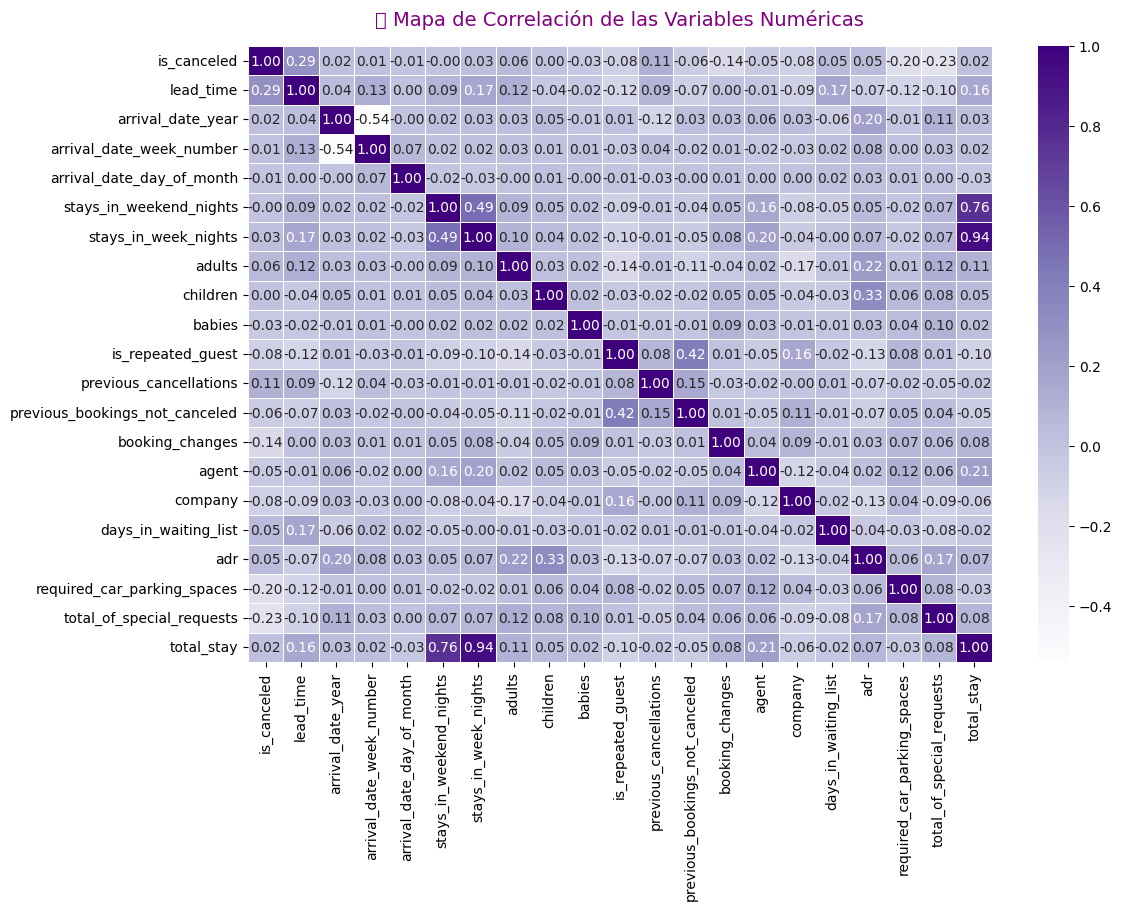

In [18]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="Purples", fmt=".2f", linewidths=0.5)

plt.title("🔍 Mapa de Correlación de las Variables Numéricas", fontsize=14, color='purple', pad=15)
plt.show()

<h2 style="color: purple;">📈 Análisis del Mapa de Correlación</h2>

###  Correlaciones más destacadas

**1️⃣ `stays_in_week_nights` y `stays_in_weekend_nights` → correlación ≈ 0.49**  
➡️ Tiene sentido: si alguien se queda varios días entre semana, muchas veces también incluye fines de semana.  
🔹 Es una **relación positiva moderada**.

---

**2️⃣ `total_stay` con `stays_in_week_nights` (0.94) y con `stays_in_weekend_nights` (0.76)**  
➡️ Altísima correlación (lo esperable, ya que `total_stay` = suma de ambas).  
💡 Indica que estas tres variables **miden casi lo mismo**, por lo que podrías usar solo `total_stay` en modelos para evitar redundancia.

---

**3️⃣ `is_canceled` tiene correlaciones bajas con casi todas las demás**  
➡️ Esto significa que **no hay una sola variable numérica** que explique claramente las cancelaciones.  
💬 Probablemente factores categóricos como *tipo de cliente*, *país* o *canal de reserva* tengan más influencia.

---

**4️⃣ `adr` (precio por noche) muestra correlaciones leves con:**  
- `lead_time` (0.07): clientes que reservan con más anticipación tienden a pagar un poco más, pero la relación es débil.  
- `total_of_special_requests` (0.08): quienes hacen más solicitudes especiales tienden a pagar ligeramente más.  

💭 En general, el **precio (`adr`) no está fuertemente relacionado** con las variables numéricas, lo que indica que influyen más factores externos (como temporada o tipo de habitación).

---

**5️⃣ `previous_cancellations` vs `is_canceled` (-0.11)**  
➡️ Correlación negativa débil: quienes ya han cancelado antes tienden *ligeramente menos* a cancelar ahora, aunque no es una relación significativa.
